📌 Project Introduction

In this project, we use three different models to classify images of five different venues: decision tree supervised, decision tree semi-supervised and CNN.
This notebook adress only the first model.

📌 Supervised Learning
Supervised learning uses only labeled data to train the model. By leveraging the structure of decision trees, this approach accurately connect input features to their corresponding labels for making the predictive performance better.

📌 In this Project, we will:

    Analyze all the classes in the data set (EDA= exploratory data analysis) 
    Build two models that can classify images into 5 venus

📌 Install  and importing Libraries

In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip  install torchvision

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imagehash

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imagehash Pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip  install dask

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dask.diagnostics import ProgressBar
from PIL import Image
import dask.bag as db

In [9]:
import torch
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score

import platform

## Decision trees for supervised learning  -  original dataset


#### Code for use gpu in Mac

In [10]:
has_gpu = torch.cuda.is_available()
has_mps = torch.backends.mps.is_built()
device = "mps" if has_mps else "cuda" if torch.cuda.is_available() else "cpu"

In [11]:
print(f"Python Platform: {platform.platform()}")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

Python Platform: macOS-12.6-arm64-arm-64bit
MPS (Apple Metal) is AVAILABLE
Target device is mps


In [12]:
img_path = 'final_dataset'
images = []
labels = []

label_map = {
    'bar': 0,
    'beach': 1,
    'bookstore': 2,
    'restaurant': 3,
    'subway': 4
}

transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [13]:
number_classes = {
'Classbar': len(os.listdir('final_dataset/bar')),
'Classbeach': len(os.listdir('final_dataset/beach')),
'Classbookstore': len(os.listdir('final_dataset/bookstore')),
'Classrest': len(os.listdir('final_dataset/restaurant')),
'Classsub': len(os.listdir('final_dataset/subway'))}

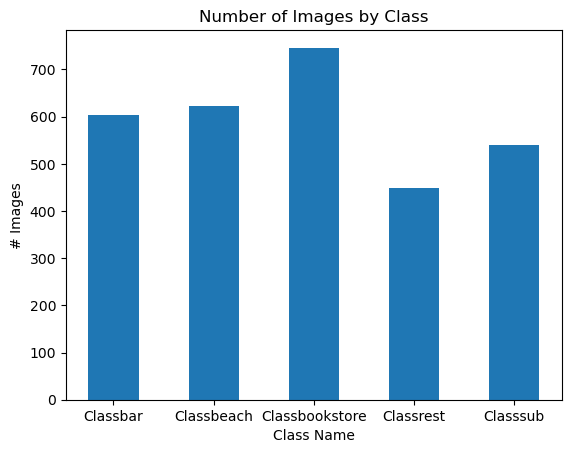

In [14]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [15]:
device = torch.device('cpu')

In [16]:
for name, num in label_map.items():
    for img_name in os.listdir(os.path.join(img_path, name)):
        img_file = Image.open(os.path.join(img_path, name, img_name)).convert('RGB')
        img = transforms(img_file).to(device)
        images.append(img.cpu().numpy())
        labels.append(num)
    print(f"finish to read all {name} images")

finish to read all bar images
finish to read all beach images
finish to read all bookstore images
finish to read all restaurant images
finish to read all subway images


📌 Data Splitting into images and labels 

In [17]:
X = np.array(images)
Y = np.array(labels)

📌 Image Preprocessing:

    Resizing: Given the variability in image dimensions, we choosee to rezise our dataset dimension to 32*32
    Normalization: Normalize pixel values for better model performance.

In [18]:
# Normalize the data
X = X / 255.0

# Reshape
X_reshape = X.reshape(X.shape[0], -1)

📌 Data splitting into train and test

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_reshape,Y, test_size=0.2, random_state=42)

In [20]:
# Train model
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=35, min_samples_split=20, min_samples_leaf=5)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=35, min_samples_leaf=5,
                       min_samples_split=20)

Accuracy: 0.6323; Precision: 0.6352; Recall: 0.6390; F1: 0.6309
Class bar - Accuracy: 0.3467; Precision: 0.5474; Recall: 0.3467; F1-score: 0.4245
Class beach - Accuracy: 0.8304; Precision: 0.8455; Recall: 0.8304; F1-score: 0.8378
Class bookstore - Accuracy: 0.7550; Precision: 0.6404; Recall: 0.7550; F1-score: 0.6930
Class restaurant - Accuracy: 0.9204; Precision: 0.8595; Recall: 0.9204; F1-score: 0.8889
Class subway - Accuracy: 0.3429; Precision: 0.2835; Recall: 0.3429; F1-score: 0.3103


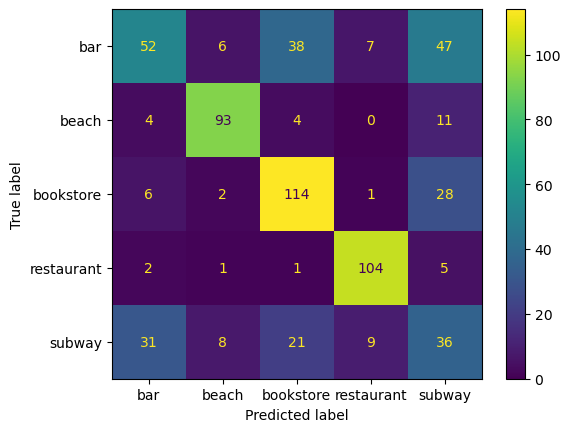

In [41]:
# Evaluation
Y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}; Precision: {precision:.4f}; Recall: {recall:.4f}; F1: {f1:.4f}")

class_correct = [0] * len(label_map)
class_total = [0] * len(label_map)

for i in range(len(Y_test)):
    label = Y_test[i]
    pred = Y_pred[i]
    if label == pred:
        class_correct[label] += 1
    class_total[label] += 1

for i in range(len(label_map)):
    class_acc = class_correct[i] / class_total[i] if class_total[i] > 0 else 0
    class_prec = precision_score(Y_test, Y_pred, labels=[i], average='macro', zero_division=0)
    class_rec = recall_score(Y_test, Y_pred, labels=[i], average='macro', zero_division=0)
    class_f1 = f1_score(Y_test, Y_pred, labels=[i], average='macro', zero_division=0)
    print(f"Class {list(label_map.keys())[i]} - Accuracy: {class_acc:.4f}; Precision: {class_prec:.4f}; Recall: {class_rec:.4f}; F1-score: {class_f1:.4f}")

confusion_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=label_map.keys())
confusion_matrix_display.plot()
plt.show()

## Decision trees for supervised learning  -  Augmented dataset

In [23]:
from torchvision import transforms
img_path = 'final_dataset_augmentated'
images = []
labels = []

label_map = {
    'bar': 0,
    'beach': 1,
    'bookstore': 2,
    'restaurant': 3,
    'subway': 4
}

transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [25]:
number_classes = {
'Classbar': len(os.listdir('final_dataset_augmentated/bar')),
'Classbeach': len(os.listdir('final_dataset_augmentated/beach')),
'Classbookstore': len(os.listdir('final_dataset_augmentated/bookstore')),
'Classrest': len(os.listdir('final_dataset_augmentated/restaurant')),
'Classsub': len(os.listdir('final_dataset_augmentated/subway'))}

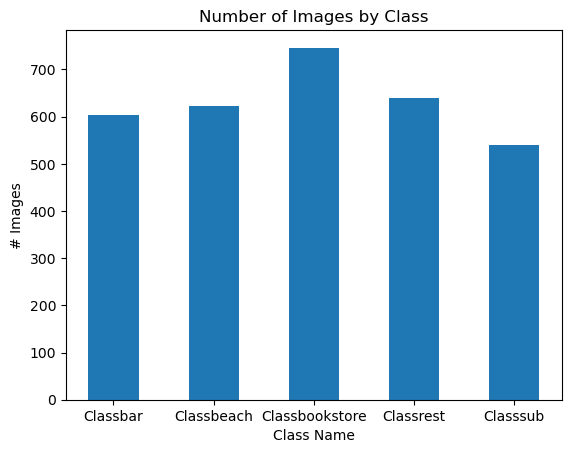

In [26]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [27]:
device = torch.device('cpu')

In [28]:
for name, num in label_map.items():
    for img_name in os.listdir(os.path.join(img_path, name)):
        img_file = Image.open(os.path.join(img_path, name, img_name)).convert('RGB')
        img = transforms(img_file).to(device)
        images.append(img.cpu().numpy())
        labels.append(num)
    print(f"finish to read all {name} images")

finish to read all bar images
finish to read all beach images
finish to read all bookstore images
finish to read all restaurant images
finish to read all subway images


📌 Data Splitting into images and labels on augmented data

In [29]:
X = np.array(images)
Y = np.array(labels)

📌 Image Preprocessing:

In [30]:
# Normalize the data
X = X / 255.0

# Reshape
X_reshape = X.reshape(X.shape[0], -1)

📌 augmented Data splitting into train and test

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_reshape,Y, test_size=0.2, random_state=42)

In [32]:
# Train model
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=35, min_samples_split=20, min_samples_leaf=5)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=35, min_samples_leaf=5,
                       min_samples_split=20)

Accuracy: 0.6323; Precision: 0.6352; Recall: 0.6390; F1: 0.6309
Class bar - Accuracy: 0.3467; Precision: 0.5474; Recall: 0.3467; F1-score: 0.4245
Class beach - Accuracy: 0.8304; Precision: 0.8455; Recall: 0.8304; F1-score: 0.8378
Class bookstore - Accuracy: 0.7550; Precision: 0.6404; Recall: 0.7550; F1-score: 0.6930
Class restaurant - Accuracy: 0.9204; Precision: 0.8595; Recall: 0.9204; F1-score: 0.8889
Class subway - Accuracy: 0.3429; Precision: 0.2835; Recall: 0.3429; F1-score: 0.3103


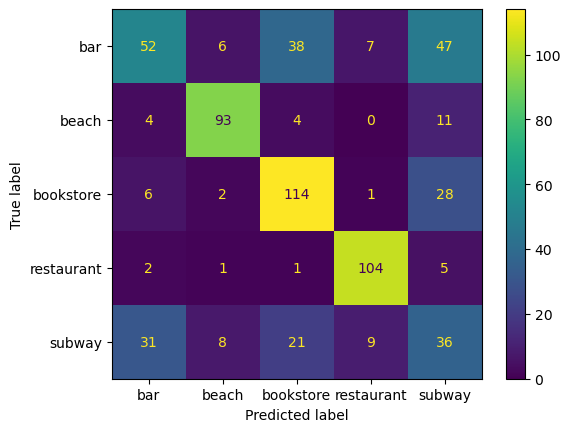

In [45]:
# Evaluation
Y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}; Precision: {precision:.4f}; Recall: {recall:.4f}; F1: {f1:.4f}")

class_correct = [0] * len(label_map)
class_total = [0] * len(label_map)

for i in range(len(Y_test)):
    label = Y_test[i]
    pred = Y_pred[i]
    if label == pred:
        class_correct[label] += 1
    class_total[label] += 1

for i in range(len(label_map)):
    class_acc = class_correct[i] / class_total[i] if class_total[i] > 0 else 0
    class_prec = precision_score(Y_test, Y_pred, labels=[i], average='macro', zero_division=0)
    class_rec = recall_score(Y_test, Y_pred, labels=[i], average='macro', zero_division=0)
    class_f1 = f1_score(Y_test, Y_pred, labels=[i], average='macro', zero_division=0)
    print(f"Class {list(label_map.keys())[i]} - Accuracy: {class_acc:.4f}; Precision: {class_prec:.4f}; Recall: {class_rec:.4f}; F1-score: {class_f1:.4f}")

confusion_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=label_map.keys())
confusion_matrix_display.plot()
plt.show()

## Decision trees for supervised learning  -  augmented dataset with hyperparameters tuning

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pickle

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.6773809523809525
Accuracy: 0.6624405705229794; Precision: 0.6504194977866817; Recall: 0.6626901594371559; F1: 0.6535331581439049
Class bar - Accuracy: 0.4267; Precision: 0.5664; Recall: 0.4267; F1-score: 0.4867
Class beach - Accuracy: 0.8214; Precision: 0.8142; Recall: 0.8214; F1-score: 0.8178
Class bookstore - Accuracy: 0.8212; Precision: 0.7209; Recall: 0.8212; F1-score: 0.7678
Class restaurant - Accuracy: 0.9204; Precision: 0.8387; Recall: 0.9204; F1-score: 0.8776
Class subway - Accuracy: 0.3238; Precision: 0.3119; Recall: 0.3238; F1-score: 0.3178


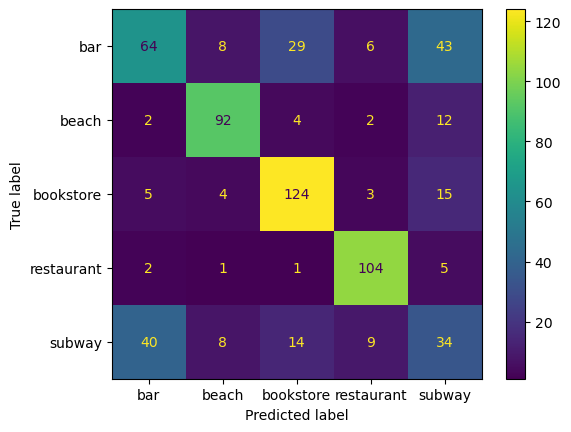

In [44]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': [ 'entropy'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)

# Print best parameters and scores
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


# Train model with best parameters
best_decision_tree = grid_search.best_estimator_
best_decision_tree.fit(X_train, Y_train)

# Save the best model
with open('best_decision_tree_model.pkl', 'wb') as model_file:
    pickle.dump(best_decision_tree, model_file)

# Evaluate the best model
Y_pred = best_decision_tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f"Accuracy: {accuracy}; Precision: {precision}; Recall: {recall}; F1: {f1}")

class_correct = [0] * len(label_map)
class_total = [0] * len(label_map)

for i in range(len(Y_test)):
    label = Y_test[i]
    pred = Y_pred[i]
    if label == pred:
        class_correct[label] += 1
    class_total[label] += 1

for i in range(len(label_map)):
    class_acc = class_correct[i] / class_total[i] if class_total[i] > 0 else 0
    class_prec = precision_score(Y_test, Y_pred, labels=[i], average='macro', zero_division=0)
    class_rec = recall_score(Y_test, Y_pred, labels=[i], average='macro', zero_division=0)
    class_f1 = f1_score(Y_test, Y_pred, labels=[i], average='macro', zero_division=0)
    print(f"Class {list(label_map.keys())[i]} - Accuracy: {class_acc:.4f}; Precision: {class_prec:.4f}; Recall: {class_rec:.4f}; F1-score: {class_f1:.4f}")

# Display the confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=label_map.keys())
confusion_matrix_display.plot()
plt.show()

After saving the best model, we try to test it on a new differents images 